In [4]:
# Importamos las librerias que se utilizaran 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats 
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [5]:
sound_quality = pd.read_csv('../Datasets/annotations.csv')

In [6]:
sound_quality.head(5)

,split,sensor_id,audio_filename,annotator_id,borough,block,latitude,longitude,year,week,...,7-X_other-unknown-human-voice_proximity,8-1_dog-barking-whining_proximity,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
0,test,0,00_026884.wav,-6,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,1,0,-1,-1,-1,-1,-1
1,test,0,00_026884.wav,-4,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2,test,0,00_026884.wav,-3,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,test,0,00_026884.wav,-1,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,test,0,00_026884.wav,0,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,0,1,0,0,0,0,0


Vamos a observar cuantas columnas existen dentro del DataFrame

In [7]:
sound_quality.columns

Index(['split', 'sensor_id', 'audio_filename', 'annotator_id', 'borough',
       'block', 'latitude', 'longitude', 'year', 'week', 'day', 'hour',
       '1-1_small-sounding-engine_presence',
       '1-2_medium-sounding-engine_presence',
       '1-3_large-sounding-engine_presence',
       '1-X_engine-of-uncertain-size_presence', '2-1_rock-drill_presence',
       '2-2_jackhammer_presence', '2-3_hoe-ram_presence',
       '2-4_pile-driver_presence',
       '2-X_other-unknown-impact-machinery_presence',
       '3-1_non-machinery-impact_presence', '4-1_chainsaw_presence',
       '4-2_small-medium-rotating-saw_presence',
       '4-3_large-rotating-saw_presence',
       '4-X_other-unknown-powered-saw_presence', '5-1_car-horn_presence',
       '5-2_car-alarm_presence', '5-3_siren_presence',
       '5-4_reverse-beeper_presence',
       '5-X_other-unknown-alert-signal_presence',
       '6-1_stationary-music_presence', '6-2_mobile-music_presence',
       '6-3_ice-cream-truck_presence',
       '6-X

No usaremos todas las columnas, pero primero veremos que tipo de valores se encuentra en la columna "1_engine_presence"

In [8]:
sound_quality['1_engine_presence'].unique()

array([-1,  1,  0], dtype=int64)

Columnas de esta forma indican la presencia de una clase de nivel general. 1 si está presente, 0 si no está presente. Si es -1, entonces la clase no fue etiquetada en esta anotación porque la anotación fue realizada por un miembro del equipo SONYC que solo anotó un grupo de clases generales a la vez al anotar el subconjunto verificado.

### Generamos un nuevo orden dentro del DF

In [9]:
new_order = sound_quality[['year', 'week', 'day', 'hour', 'borough',
                           'latitude', 'longitude', '1_engine_presence']]

sound_quality = new_order

sound_quality.head(10)


,year,week,day,hour,borough,latitude,longitude,1_engine_presence
0,2019,43,4,8,1,40.72951,-73.99388,-1
1,2019,43,4,8,1,40.72951,-73.99388,1
2,2019,43,4,8,1,40.72951,-73.99388,1
3,2019,43,4,8,1,40.72951,-73.99388,-1
4,2019,43,4,8,1,40.72951,-73.99388,1
5,2019,43,4,8,1,40.72951,-73.99388,1
6,2019,43,4,8,1,40.72951,-73.99388,1
7,2019,43,4,8,1,40.72951,-73.99388,1
8,2019,20,1,20,1,40.72951,-73.99388,-1
9,2019,20,1,20,1,40.72951,-73.99388,1


In [10]:
sound_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62022 entries, 0 to 62021
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               62022 non-null  int64  
 1   week               62022 non-null  int64  
 2   day                62022 non-null  int64  
 3   hour               62022 non-null  int64  
 4   borough            62022 non-null  int64  
 5   latitude           62022 non-null  float64
 6   longitude          62022 non-null  float64
 7   1_engine_presence  62022 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 3.8 MB


### Generamos una nueva columna con la fecha

In [11]:
from datetime import datetime, timedelta

In [12]:
# Función para convertir año, semana y día a una fecha
def year_week_day_to_date(row):
    year = int(row['year'])
    week = int(row['week'])
    day = int(row['day'])
    first_day_of_year = datetime(year, 1, 1)
    # Añadir el número de semanas y días
    return first_day_of_year + timedelta(weeks=week-1, days=day)

# Crear una nueva columna 'date' usando la función
sound_quality['date'] = sound_quality.apply(year_week_day_to_date, axis=1)

# Extraer el mes de la columna 'date'
sound_quality['month'] = sound_quality['date'].dt.month

sound_quality = sound_quality.drop(columns=['week'], axis=1)


In [13]:
sound_quality.head(10)

,year,day,hour,borough,latitude,longitude,1_engine_presence,date,month
0,2019,4,8,1,40.72951,-73.99388,-1,2019-10-26,10
1,2019,4,8,1,40.72951,-73.99388,1,2019-10-26,10
2,2019,4,8,1,40.72951,-73.99388,1,2019-10-26,10
3,2019,4,8,1,40.72951,-73.99388,-1,2019-10-26,10
4,2019,4,8,1,40.72951,-73.99388,1,2019-10-26,10
5,2019,4,8,1,40.72951,-73.99388,1,2019-10-26,10
6,2019,4,8,1,40.72951,-73.99388,1,2019-10-26,10
7,2019,4,8,1,40.72951,-73.99388,1,2019-10-26,10
8,2019,1,20,1,40.72951,-73.99388,-1,2019-05-15,5
9,2019,1,20,1,40.72951,-73.99388,1,2019-05-15,5


### Acomodamos nuevamente el orden de las columnas

In [14]:
new_order2 = sound_quality[['date', 'day', 'month', 'year', 'hour',
                            'borough', 'latitude', 'longitude', '1_engine_presence']]

sound_quality = new_order2

sound_quality.head(10)

,date,day,month,year,hour,borough,latitude,longitude,1_engine_presence
0,2019-10-26,4,10,2019,8,1,40.72951,-73.99388,-1
1,2019-10-26,4,10,2019,8,1,40.72951,-73.99388,1
2,2019-10-26,4,10,2019,8,1,40.72951,-73.99388,1
3,2019-10-26,4,10,2019,8,1,40.72951,-73.99388,-1
4,2019-10-26,4,10,2019,8,1,40.72951,-73.99388,1
5,2019-10-26,4,10,2019,8,1,40.72951,-73.99388,1
6,2019-10-26,4,10,2019,8,1,40.72951,-73.99388,1
7,2019-10-26,4,10,2019,8,1,40.72951,-73.99388,1
8,2019-05-15,1,5,2019,20,1,40.72951,-73.99388,-1
9,2019-05-15,1,5,2019,20,1,40.72951,-73.99388,1


In [15]:
# Verificamos con cuantos años estamos trabajando
sound_quality['year'].unique()

array([2019, 2017, 2016, 2018], dtype=int64)

In [16]:
import datetime as dt

In [17]:
sound_quality['date'].dt.day_name()

0         Saturday
1         Saturday
2         Saturday
3         Saturday
4         Saturday
           ...    
62017     Saturday
62018     Saturday
62019    Wednesday
62020    Wednesday
62021    Wednesday
Name: date, Length: 62022, dtype: object

-    0   Lunes       Monday
-    1   Martes      Tuesday
-    2   Miercoles   Wednesday
-    3   Jueves      Thuesday
-    4   Viernes     Friday
-    5   Sabado      Saturday
-    6   Domingo     Sunday

In [18]:
sound_quality.head()

,date,day,month,year,hour,borough,latitude,longitude,1_engine_presence
0,2019-10-26,4,10,2019,8,1,40.72951,-73.99388,-1
1,2019-10-26,4,10,2019,8,1,40.72951,-73.99388,1
2,2019-10-26,4,10,2019,8,1,40.72951,-73.99388,1
3,2019-10-26,4,10,2019,8,1,40.72951,-73.99388,-1
4,2019-10-26,4,10,2019,8,1,40.72951,-73.99388,1


In [19]:
#Buscamos valores duplicados
sound_quality.duplicated().sum()

36215

In [20]:
sound_quality.shape

(62022, 9)

In [37]:
# Ahora identifico la cantidad de valores nulos que qudaron en el dataset
for column in sound_quality.columns:
    print(f'Hay {sound_quality[column].isna().sum()} valores nulos en {column}')

Hay 0 valores nulos en date
Hay 0 valores nulos en day
Hay 0 valores nulos en month
Hay 0 valores nulos en year
Hay 0 valores nulos en hour
Hay 0 valores nulos en borough
Hay 0 valores nulos en latitude
Hay 0 valores nulos en longitude
Hay 0 valores nulos en 1_engine_presence


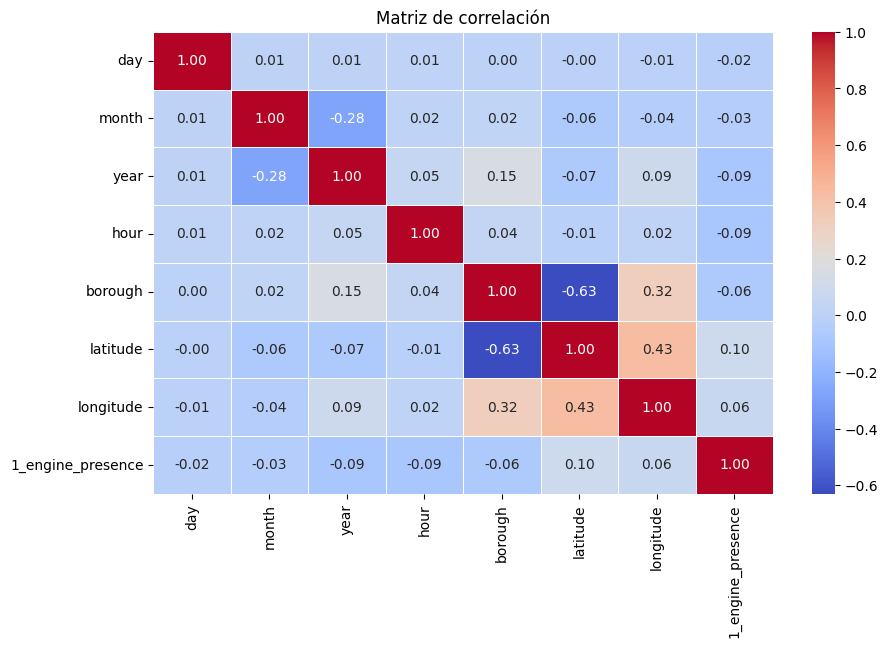

In [36]:
figsize=(10, 6)
numeric_df = sound_quality.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=figsize)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

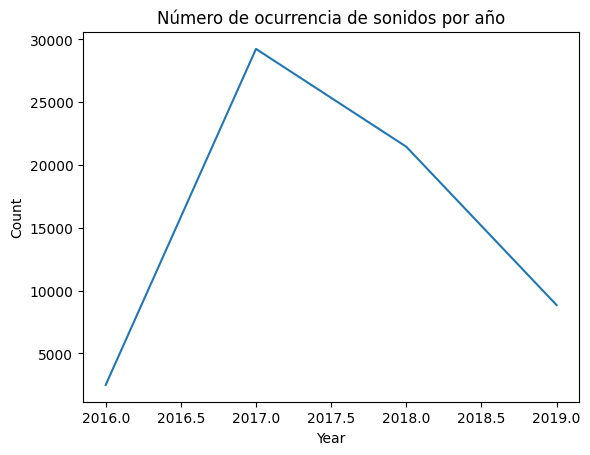

In [21]:
# Agrupa los datos por año y cuenta el número de ocurrencias en cada año
year_counts = sound_quality['year'].value_counts().sort_index()

# Crea el gráfico de líneas
plt.plot(year_counts.index, year_counts.values)

# Personaliza el gráfico
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Número de ocurrencia de sonidos por año')

# Muestra el gráfico
plt.show()

<Figure size 1000x600 with 0 Axes>

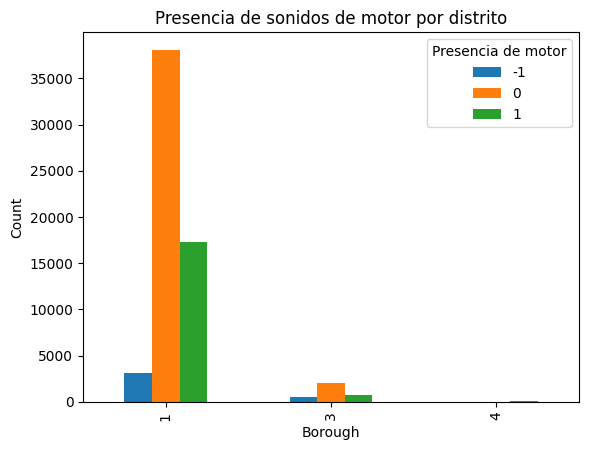

In [22]:
plt.figure(figsize=(10, 6))
sound_quality.groupby('borough')['1_engine_presence'].value_counts().unstack().plot(kind='bar')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.title('Presencia de sonidos de motor por distrito')
plt.legend(title='Presencia de motor')
plt.show()

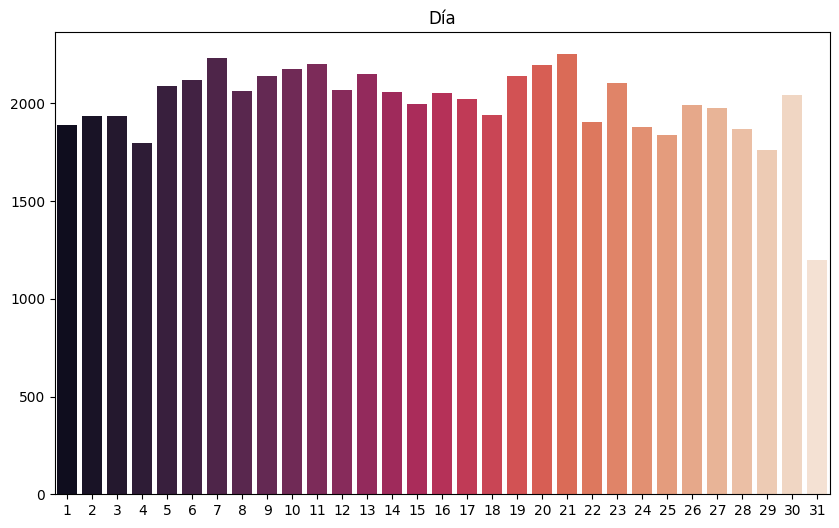

In [23]:
day_counts = sound_quality['date'].dt.day.value_counts().sort_index()

# Nombres de los día en formato corto
dias = list(range(1,32))

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=dias, y=day_counts, palette="rocket")
ax.set_title('Día')
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

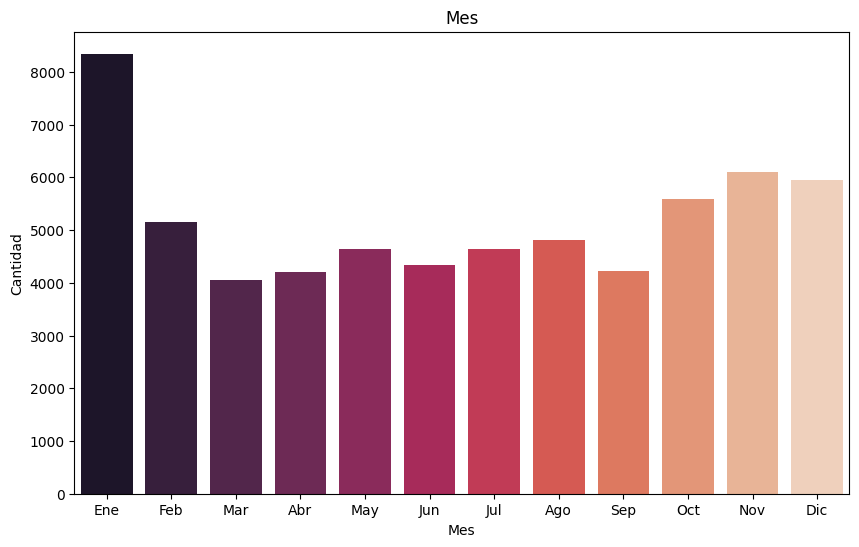

In [24]:
# Cuenta la frecuencia de cada mes en la columna
month_counts = sound_quality['date'].dt.month.value_counts().sort_index()

# Nombres de los meses en formato corto
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Crea un gráfico de barras
plt.figure(figsize=(10, 6))

ax = sns.barplot(x=meses, y=month_counts, palette="rocket")
ax.set_title('Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad')

plt.show()